# Multi-level Text Classification 

##### _Documentation:_ <br>
Increasingly large document collections require improved information processing methods for searching, retrieving, and organizing text documents. Central to these information processing methods is document classification, which has become an important task supervised learning aims to solve. Recently, the performance of traditional supervised classifiers has degraded as the number of documents has increased. This exponential growth of document volume has also increated the number of categories. HDLTex employs, which is a hierarchical classification for Hierarchical Deep Learning for Text classification (HDLTex), stacks of deep learning architectures to provide hierarchical understanding of the documents.

Importing the required libraries

In [46]:
from keras.layers import Dropout, Dense,Input,Embedding,Flatten, MaxPooling1D, Conv1D, LSTM
from keras.layers import Dense, Dropout, Activation
from keras.layers import Dropout, Dense, GRU, Embedding
from keras.models import Sequential,Model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
from sklearn import metrics
import seaborn as sns

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.datasets import fetch_20newsgroups
from keras.layers.merge import Concatenate

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

## Traditional Text classification techniques

Loading in data

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation).

In [3]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

### Boosting and Bagging

Boosting

In [4]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', GradientBoostingClassifier(n_estimators=100)),
                     ])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.81      0.66      0.73       319
           1       0.69      0.70      0.69       389
           2       0.72      0.69      0.71       394
           3       0.63      0.73      0.67       392
           4       0.77      0.78      0.77       385
           5       0.84      0.64      0.73       395
           6       0.81      0.83      0.82       390
           7       0.88      0.73      0.80       396
           8       0.90      0.86      0.88       398
           9       0.92      0.85      0.89       397
          10       0.94      0.87      0.90       399
          11       0.89      0.81      0.85       396
          12       0.32      0.69      0.44       393
          13       0.86      0.71      0.78       396
          14       0.87      0.83      0.85       394
          15       0.83      0.86      0.85       398
          16       0.66      0.80      0.72       364
          17       0.96    

Bagging

In [5]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', BaggingClassifier(KNeighborsClassifier())),
                     ])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.60      0.71      0.65       319
           1       0.64      0.56      0.60       389
           2       0.61      0.54      0.57       394
           3       0.56      0.59      0.58       392
           4       0.60      0.56      0.58       385
           5       0.69      0.62      0.65       395
           6       0.56      0.48      0.52       390
           7       0.78      0.70      0.74       396
           8       0.81      0.83      0.82       398
           9       0.74      0.76      0.75       397
          10       0.83      0.85      0.84       399
          11       0.73      0.84      0.78       396
          12       0.66      0.51      0.57       393
          13       0.78      0.48      0.60       396
          14       0.78      0.79      0.78       394
          15       0.68      0.80      0.73       398
          16       0.70      0.75      0.72       364
          17       0.58    

### Naive Bayes Classifier

In [6]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                     ])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.80      0.52      0.63       319
           1       0.81      0.65      0.72       389
           2       0.82      0.65      0.73       394
           3       0.67      0.78      0.72       392
           4       0.86      0.77      0.81       385
           5       0.89      0.75      0.82       395
           6       0.93      0.69      0.80       390
           7       0.85      0.92      0.88       396
           8       0.94      0.93      0.93       398
           9       0.92      0.90      0.91       397
          10       0.89      0.97      0.93       399
          11       0.59      0.97      0.74       396
          12       0.84      0.60      0.70       393
          13       0.92      0.74      0.82       396
          14       0.84      0.89      0.87       394
          15       0.44      0.98      0.61       398
          16       0.64      0.94      0.76       364
          17       0.93    

### K Nearest Neighbor

In [7]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', KNeighborsClassifier()),
                     ])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.43      0.76      0.55       319
           1       0.50      0.61      0.55       389
           2       0.56      0.57      0.57       394
           3       0.53      0.58      0.56       392
           4       0.59      0.56      0.57       385
           5       0.69      0.60      0.64       395
           6       0.58      0.45      0.51       390
           7       0.75      0.69      0.72       396
           8       0.84      0.81      0.82       398
           9       0.77      0.72      0.74       397
          10       0.85      0.84      0.84       399
          11       0.76      0.84      0.80       396
          12       0.70      0.50      0.58       393
          13       0.82      0.49      0.62       396
          14       0.79      0.76      0.78       394
          15       0.75      0.76      0.76       398
          16       0.70      0.73      0.72       364
          17       0.62    

### Support Vector Machine

In [8]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),
                     ])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       319
           1       0.76      0.80      0.78       389
           2       0.77      0.73      0.75       394
           3       0.71      0.76      0.74       392
           4       0.84      0.86      0.85       385
           5       0.87      0.76      0.81       395
           6       0.83      0.91      0.87       390
           7       0.92      0.91      0.91       396
           8       0.95      0.95      0.95       398
           9       0.92      0.95      0.93       397
          10       0.96      0.98      0.97       399
          11       0.93      0.94      0.93       396
          12       0.81      0.79      0.80       393
          13       0.90      0.87      0.88       396
          14       0.90      0.93      0.92       394
          15       0.84      0.93      0.88       398
          16       0.75      0.92      0.82       364
          17       0.97    

### Decision Trees

In [9]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', tree.DecisionTreeClassifier()),
                     ])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.47      0.48      0.47       319
           1       0.41      0.43      0.42       389
           2       0.51      0.56      0.53       394
           3       0.46      0.40      0.43       392
           4       0.50      0.56      0.53       385
           5       0.47      0.47      0.47       395
           6       0.67      0.72      0.69       390
           7       0.61      0.58      0.60       396
           8       0.75      0.75      0.75       398
           9       0.53      0.56      0.55       397
          10       0.68      0.67      0.68       399
          11       0.72      0.70      0.71       396
          12       0.33      0.34      0.33       393
          13       0.52      0.44      0.48       396
          14       0.61      0.62      0.62       394
          15       0.71      0.73      0.72       398
          16       0.50      0.63      0.56       364
          17       0.79    

### Random Forest

In [10]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier(n_estimators=100)),
                     ])
text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       319
           1       0.57      0.69      0.62       389
           2       0.64      0.75      0.69       394
           3       0.61      0.62      0.61       392
           4       0.75      0.79      0.77       385
           5       0.77      0.69      0.73       395
           6       0.75      0.91      0.82       390
           7       0.82      0.78      0.80       396
           8       0.90      0.90      0.90       398
           9       0.80      0.87      0.83       397
          10       0.88      0.92      0.90       399
          11       0.87      0.91      0.89       396
          12       0.67      0.50      0.57       393
          13       0.82      0.67      0.74       396
          14       0.85      0.88      0.87       394
          15       0.67      0.92      0.78       398
          16       0.67      0.86      0.75       364
          17       0.94    

## Random Multimodel Deep Learning Networks (RMDL)

The exponential growth in the number of complex datasets every year requires more enhancement in machine learning methods to provide robust and accurate data classification. Lately, deep learning approaches are achieving better results compared to previous machine learning algorithms on tasks like image classification, natural language processing, face recognition, and etc. The success of these deep learning algorithms rely on their capacity to model complex and non-linear relationships within the data. 

For Deep Neural Networks (DNN), input layer could be tf-ifd, word embedding, or etc. The output layer houses neurons equal to the number of classes for multi-class classification and only one neuron for binary classification.

In [63]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [64]:
MAX_SEQUENCE_LENGTH = 500
MAX_NB_WORDS = 50000
EMBEDDING_DIM = 100

In [65]:
text = np.concatenate((X_train, X_test), axis=0)
text = np.array(text)
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
#creates vocabulary index based on frequency of words
tokenizer.fit_on_texts(text)
#transform each text into a sequence of integers
sequences = tokenizer.texts_to_sequences(text)
word_index = tokenizer.word_index
text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
print('Found %s unique tokens.' % len(word_index))


indices = np.arange(text.shape[0])
# np.random.shuffle(indices)
text = text[indices]
print(text.shape)
X_train = text[0:len(X_train), ]
X_test = text[len(X_train):, ]


embeddings_index = {}
f = open("glove.6B.100d.txt", encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Total %s word vectors.' % len(embeddings_index))

Found 179209 unique tokens.
(18846, 500)
Total 400000 word vectors.


##  CNN model

In [14]:
def Build_Model_CNN_Text(word_index, embeddings_index, nclasses, MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=100, dropout=0.2):

    model = Sequential()
    #That + 1 is because of reserving padding (i.e. index zero)
    embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

    embedding_layer = Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH, trainable=True)

    # applying a more complex convolutional approach
    convs = []
    filter_sizes = []
    layer = 5
    print("Filter  ",layer)
    for fl in range(0,layer):
        filter_sizes.append((fl+2))

    node = 128
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    for fsz in filter_sizes:
        l_conv = Conv1D(node, kernel_size=fsz, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(5)(l_conv)
        convs.append(l_pool)

    l_merge = Concatenate(axis=1)(convs)
    l_cov1 = Conv1D(node, 5, activation='relu')(l_merge)
    l_cov1 = Dropout(dropout)(l_cov1)
    l_pool1 = MaxPooling1D(5)(l_cov1)
    l_cov2 = Conv1D(node, 5, activation='relu')(l_pool1)
    l_cov2 = Dropout(dropout)(l_cov2)
    l_pool2 = MaxPooling1D(30)(l_cov2)
    l_flat = Flatten()(l_pool2)
    l_dense = Dense(1024, activation='relu')(l_flat)
    l_dense = Dropout(dropout)(l_dense)
    l_dense = Dense(512, activation='relu')(l_dense)
    l_dense = Dropout(dropout)(l_dense)
    preds = Dense(nclasses, activation='softmax')(l_dense)
    model = Model(sequence_input, preds)

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [15]:
model_CNN = Build_Model_CNN_Text(word_index,embeddings_index, 20)

#Model summary
model_CNN.summary()

history = model_CNN.fit(X_train, y_train,validation_data=(X_test, y_test),epochs=20,batch_size=128,verbose=2)
history

Filter   5
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 500)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 500, 100)     17921000    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 499, 128)     25728       embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 498, 128)     38528       embedding_1[0][0]                
_________________________________________________________________________________

C:\Users\Neha\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 11314 samples, validate on 7532 samples
Epoch 1/20
 - 114s - loss: 2.7262 - accuracy: 0.1071 - val_loss: 2.2898 - val_accuracy: 0.1899
Epoch 2/20
 - 136s - loss: 1.8019 - accuracy: 0.3406 - val_loss: 1.5587 - val_accuracy: 0.4723
Epoch 3/20
 - 141s - loss: 1.0746 - accuracy: 0.6101 - val_loss: 1.1306 - val_accuracy: 0.6225
Epoch 4/20
 - 141s - loss: 0.6299 - accuracy: 0.7690 - val_loss: 0.9835 - val_accuracy: 0.6759
Epoch 5/20
 - 140s - loss: 0.3862 - accuracy: 0.8660 - val_loss: 0.8962 - val_accuracy: 0.7027
Epoch 6/20
 - 140s - loss: 0.2692 - accuracy: 0.9069 - val_loss: 0.9102 - val_accuracy: 0.7181
Epoch 7/20
 - 139s - loss: 0.1416 - accuracy: 0.9530 - val_loss: 1.0319 - val_accuracy: 0.7146
Epoch 8/20
 - 140s - loss: 0.0972 - accuracy: 0.9696 - val_loss: 1.0949 - val_accuracy: 0.7022
Epoch 9/20
 - 134s - loss: 0.0752 - accuracy: 0.9763 - val_loss: 0.9985 - val_accuracy: 0.7475
Epoch 10/20
 - 139s - loss: 0.0656 - accuracy: 0.9802 - val_loss: 0.9961 - val_accuracy: 0.7464


In [16]:
predicted = model_CNN.predict(X_test)
predicted = np.argmax(predicted, axis=1)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       319
           1       0.65      0.73      0.69       389
           2       0.79      0.63      0.70       394
           3       0.65      0.54      0.59       392
           4       0.62      0.73      0.67       385
           5       0.72      0.74      0.73       395
           6       0.88      0.77      0.82       390
           7       0.91      0.81      0.86       396
           8       0.91      0.87      0.89       398
           9       0.95      0.86      0.90       397
          10       0.91      0.98      0.94       399
          11       0.73      0.89      0.80       396
          12       0.59      0.68      0.63       393
          13       0.84      0.86      0.85       396
          14       0.86      0.87      0.87       394
          15       0.89      0.82      0.85       398
          16       0.73      0.81      0.77       364
          17       0.94    

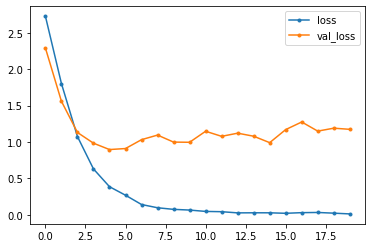

In [17]:
#Plot loss per epoch
plt.plot(history.history['loss'], label='loss', marker='.')
plt.plot(history.history['val_loss'], label='val_loss', marker='.')
plt.legend()
plt.show()

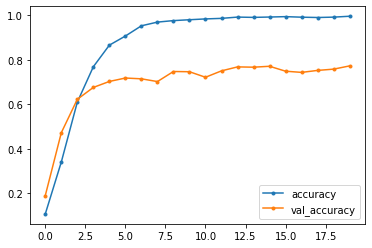

In [18]:
# Plot accuracy per epoch
plt.plot(history.history['accuracy'], label='accuracy', marker='.')
plt.plot(history.history['val_accuracy'], label='val_accuracy', marker='.')
plt.legend()
plt.show()

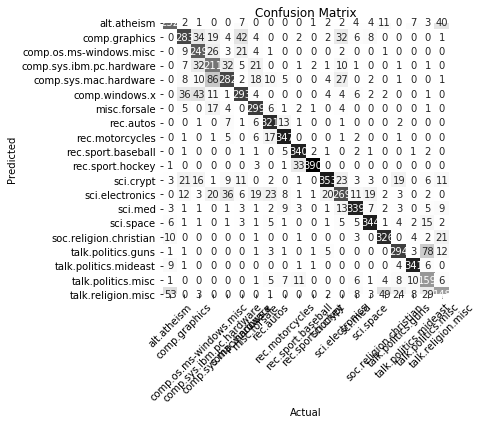

In [19]:
cnf_mat = confusion_matrix(y_test, predicted)

fig, ax = plt.subplots(figsize=(10,5))
fig = sns.heatmap(cnf_mat.T, square=True, annot=True, fmt='d', cmap='binary', cbar=False)

plt.xlabel('Actual')
ax.set_xticklabels(newsgroups_train.target_names, rotation=45)

plt.ylabel('Predicted')
ax.set_yticklabels(newsgroups_train.target_names, rotation=0)

plt.title('Confusion Matrix')

plt.show()

## Recurrent Neural Network (RNN)

In RNN, the neural net considers the information of previous nodes in a very sophisticated method which allows for better semantic analysis of the structures in the dataset. RNN assigns more weights to the previous data points of sequence. Therefore, this technique is a powerful method for text, string and sequential data classification. 

_Gated Recurrent Unit(GRU)_

GRU is a gating mechanism for RNN that is a simplified variant of the LSTM architecture, but there are differences as follows: GRU contains two gates and does not possess any internal memory.

_Long Short Term Memory(LSTM)_

Long Short-Term Memory (LSTM) is a special type of RNN that preserves long term dependency in a more effective way compared to the basic RNNs. This is particularly useful to overcome vanishing gradient problem. Although LSTM has a chain-like structure similar to RNN, LSTM uses multiple gates to carefully regulate the amount of information that will be allowed into each node state.

In [68]:
def Build_Model_RNN_GRU(word_index, embeddings_index, nclasses,  MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=100, dropout=0.5):
    model = Sequential()
    hidden_layer = 3
    gru_node = 32
    embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
    model.add(Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    print(gru_node)
    for i in range(0,hidden_layer):
        model.add(GRU(gru_node, return_sequences=True, recurrent_dropout=0.2))
        model.add(Dropout(dropout))
    model.add(GRU(gru_node, recurrent_dropout=0.2))
    model.add(Dropout(dropout))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(nclasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [69]:
model_RNN = Build_Model_RNN_GRU(word_index,embeddings_index, 20)
history_RNN = model_RNN.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, verbose=2)
history_RNN

32
Train on 11314 samples, validate on 7532 samples
Epoch 1/20
 - 212s - loss: nan - accuracy: 0.0423 - val_loss: nan - val_accuracy: 0.0424
Epoch 2/20
 - 217s - loss: nan - accuracy: 0.0424 - val_loss: nan - val_accuracy: 0.0424
Epoch 3/20
 - 218s - loss: nan - accuracy: 0.0424 - val_loss: nan - val_accuracy: 0.0424
Epoch 4/20
 - 225s - loss: nan - accuracy: 0.0424 - val_loss: nan - val_accuracy: 0.0424
Epoch 5/20
 - 250s - loss: nan - accuracy: 0.0424 - val_loss: nan - val_accuracy: 0.0424
Epoch 6/20
 - 234s - loss: nan - accuracy: 0.0424 - val_loss: nan - val_accuracy: 0.0424
Epoch 7/20
 - 214s - loss: nan - accuracy: 0.0424 - val_loss: nan - val_accuracy: 0.0424
Epoch 8/20
 - 242s - loss: nan - accuracy: 0.0424 - val_loss: nan - val_accuracy: 0.0424
Epoch 9/20
 - 216s - loss: nan - accuracy: 0.0424 - val_loss: nan - val_accuracy: 0.0424
Epoch 10/20
 - 205s - loss: nan - accuracy: 0.0424 - val_loss: nan - val_accuracy: 0.0424
Epoch 11/20
 - 199s - loss: nan - accuracy: 0.0424 - val_

In [ ]:
predicted = model_RNN.predict(X_test)
print(metrics.classification_report(y_test, predicted))

In [ ]:
#Plot loss per epoch
plt.plot(history_RNN.history['loss'], label='loss', marker='.')
plt.plot(history_RNN.history['val_loss'], label='val_loss', marker='.')
plt.legend()
plt.show()

In [ ]:
# Plot accuracy per epoch
plt.plot(history_RNN.history['accuracy'], label='accuracy', marker='.')
plt.plot(history_RNN.history['val_accuracy'], label='val_accuracy', marker='.')
plt.legend()
plt.show()

In [ ]:
cnf_mat = confusion_matrix(y_test, predicted)

fig, ax = plt.subplots(figsize=(10,5))
fig = sns.heatmap(cnf_mat.T, square=True, annot=True, fmt='d', cmap='binary', cbar=False)

plt.xlabel('Actual')
ax.set_xticklabels(newsgroups_train.target_names, rotation=45)

plt.ylabel('Predicted')
ax.set_yticklabels(newsgroups_train.target_names, rotation=0)

plt.title('Confusion Matrix')

plt.show()

In [51]:
def Build_Model_RCNN_LSTM(word_index, embeddings_index, nclasses, MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=100):

    kernel_size = 2
    filters = 256
    pool_size = 2
    gru_node = 256

    embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

    model = Sequential()
    model.add(Embedding(len(word_index) + 1, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(LSTM(gru_node, recurrent_dropout=0.2))
    model.add(Dense(1024,activation='relu'))
    model.add(Dense(nclasses))
    model.add(Activation('softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [52]:
model_RCNN = Build_Model_RCNN_LSTM(word_index,embeddings_index, 20)
history_RNN_LSTM = model_RCNN.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, verbose=2)
history_RNN_LSTM

Train on 11314 samples, validate on 7532 samples
Epoch 1/20
 - 147s - loss: 2.7029 - accuracy: 0.1046 - val_loss: 2.3974 - val_accuracy: 0.1533
Epoch 2/20
 - 158s - loss: 2.1751 - accuracy: 0.1985 - val_loss: 2.0688 - val_accuracy: 0.2420
Epoch 3/20
 - 164s - loss: 1.8196 - accuracy: 0.2900 - val_loss: 1.7403 - val_accuracy: 0.3294
Epoch 4/20
 - 723s - loss: 1.5419 - accuracy: 0.3812 - val_loss: 1.6805 - val_accuracy: 0.3611
Epoch 5/20
 - 364s - loss: 1.3011 - accuracy: 0.4838 - val_loss: 1.4065 - val_accuracy: 0.4898
Epoch 6/20
 - 254s - loss: 1.0814 - accuracy: 0.5774 - val_loss: 1.3110 - val_accuracy: 0.5199
Epoch 7/20
 - 259s - loss: 0.8543 - accuracy: 0.6743 - val_loss: 1.1914 - val_accuracy: 0.5882
Epoch 8/20
 - 271s - loss: 0.6846 - accuracy: 0.7493 - val_loss: 1.1313 - val_accuracy: 0.6466
Epoch 9/20
 - 261s - loss: 0.5753 - accuracy: 0.7963 - val_loss: 1.0921 - val_accuracy: 0.6657
Epoch 10/20
 - 253s - loss: 0.4789 - accuracy: 0.8301 - val_loss: 0.9955 - val_accuracy: 0.7030


In [62]:
predicted = model_RCNN.predict_classes(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65       319
           1       0.60      0.55      0.58       389
           2       0.84      0.57      0.68       394
           3       0.68      0.59      0.63       392
           4       0.55      0.73      0.63       385
           5       0.73      0.67      0.70       395
           6       0.85      0.77      0.81       390
           7       0.82      0.84      0.83       396
           8       0.85      0.90      0.87       398
           9       0.93      0.91      0.92       397
          10       0.93      0.95      0.94       399
          11       0.87      0.84      0.86       396
          12       0.52      0.66      0.58       393
          13       0.87      0.82      0.85       396
          14       0.86      0.85      0.85       394
          15       0.79      0.87      0.83       398
          16       0.69      0.85      0.76       364
          17       0.91    

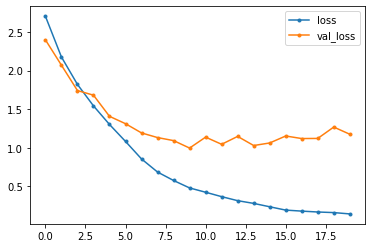

In [57]:
#Plot loss per epoch
plt.plot(history_RNN_LSTM.history['loss'], label='loss', marker='.')
plt.plot(history_RNN_LSTM.history['val_loss'], label='val_loss', marker='.')
plt.legend()
plt.show()

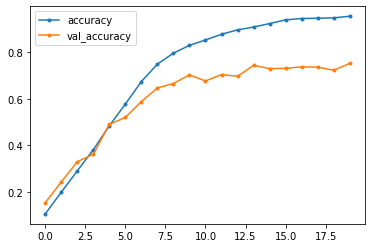

In [58]:
# Plot accuracy per epoch
plt.plot(history_RNN_LSTM.history['accuracy'], label='accuracy', marker='.')
plt.plot(history_RNN_LSTM.history['val_accuracy'], label='val_accuracy', marker='.')
plt.legend()
plt.show()

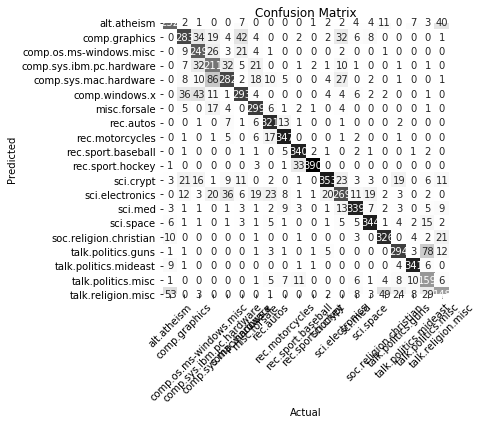

In [59]:
cnf_mat = confusion_matrix(y_test, predicted)

fig, ax = plt.subplots(figsize=(10,5))
fig = sns.heatmap(cnf_mat.T, square=True, annot=True, fmt='d', cmap='binary', cbar=False)

plt.xlabel('Actual')
ax.set_xticklabels(newsgroups_train.target_names, rotation=45)

plt.ylabel('Predicted')
ax.set_yticklabels(newsgroups_train.target_names, rotation=0)

plt.title('Confusion Matrix')

plt.show()